In [1]:
import pandas as pd
import requests
import json
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [2]:
# This file has the age on the first marriage of a woman in 2015. Source: Gapminder (http://www.gapminder.org/data/).

agemarriage = pd.read_csv("agemarriage.csv")
agemarriage.columns = 'Country', 'Age married'

In [8]:
# I now want to see how the age at first marriage compares with life exptectancy for women.
response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.LE00.FE.IN?per_page=250&date=2005:2005&format=json")
data = response.json()
df = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df['country'])))
df['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df['indicator'])))
df.head()
lifeexpect = df[['country_cleaned', 'value']]
lifeexpect.columns = 'Country', 'Life Expectancy'

In [11]:
# I now want to see how does the life expectancy compare to the age at first marriage.

merged1 = pd.merge(lifeexpect, agemarriage, on='Country')
merged1

,Country,Life Expectancy,Age married
0,Afghanistan,58.151,17.839683
1,Albania,79.374,23.326509
2,Algeria,74.357,29.600000
3,Angola,49.954,NaN
4,Argentina,78.581,23.263962
5,Armenia,76.736,22.986034
6,Australia,83.300,28.931255
7,Austria,82.200,28.937569
8,Azerbaijan,71.803,23.886307
9,Bahrain,76.298,25.904604


In [13]:
x = merged1['Life Expectancy']
y = merged1['Age married']

scipy.stats.pearsonr(x, y)

# This doesn't give me any value so is statistically insignificant.

(nan, 1.0)

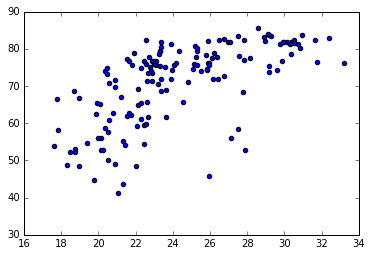

In [14]:
plt.scatter(merged1['Age married'], merged1['Life Expectancy'])

# I can see some sort of weak positive relationship. It looks like the later in life you marry, the longer you live.
# However, I don't think I can call it correlation (see above).

In [15]:
# I now want to compare the age on first marriage with fertility rate per woman.

response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.TFRT.IN?per_page=250&date=2005:2005&format=json")
data = response.json()
df2 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df2['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['country'])))
df2['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df2['indicator'])))
fertilityrate = df2[['country_cleaned', 'value']]
fertilityrate.columns = 'Country', 'Fertility Rate'
merged2 = pd.merge(fertilityrate, agemarriage, on='Country')

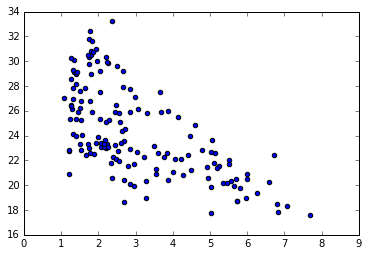

In [17]:
plt.scatter(merged2['Fertility Rate'], merged1['Age married'])

# We can see some sort of negative correlation - so the younger you marry at, the more children you are likely to have.

In [34]:
# I now want to compare the age on first marriage with maternity mortality ratio.

response = requests.get("http://api.worldbank.org/countries/indicators/SH.STA.MMRT?per_page=250&date=2005:2005&format=json")
data = response.json()
df3 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df3['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df3['country'])))
df3['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df3['indicator'])))
mmortality = df3[['country_cleaned', 'value']]
mmortality.columns = 'Country', 'Mortality Rate'
merged3 = pd.merge(mmortality, agemarriage, on='Country')

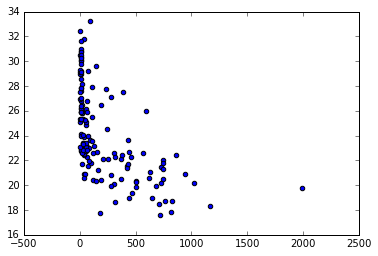

In [35]:
plt.scatter(merged3['Mortality Rate'], merged['Age married'])

In [36]:
# Mortality rate, per infant.

response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.IMRT.IN?per_page=250&date=2005:2005&format=json")
data = response.json()
df4 = pd.read_json(json.dumps(data[1]))
df4.head()
# I need to clean the DataFrame, as per usual
df4['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df4['country'])))
df4['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df4['indicator'])))
imortality = df4[['country_cleaned', 'value']]
imortality.columns = 'Country', 'Infant Mortality Rate'
merged4 = pd.merge(imortality, agemarriage, on='Country')

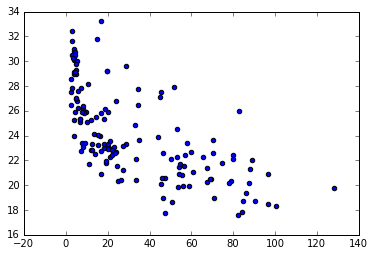

In [37]:
plt.scatter(merged4['Infant Mortality Rate'], merged['Age married'])

# I can see some sort of negative correlation

In [41]:
# Mortality rate under 5.

response = requests.get("http://api.worldbank.org/countries/indicators/SH.DYN.MORT?per_page=250&date=2005:2005&format=json")
data = response.json()
df5 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df5['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['country'])))
df5['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df5['indicator'])))
cmortality = df5[['country_cleaned', 'value']]
cmortality.columns = 'Country', 'Child Mortality Rate'
merged5 = pd.merge(cmortality, agemarriage, on='Country')

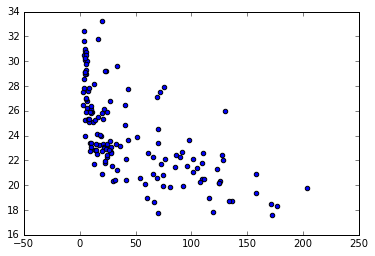

In [42]:
plt.scatter(merged5['Child Mortality Rate'], merged['Age married'])
# Again, the mortality of children seems to be lower if you marry later.

In [43]:
# Net official aid received.

response = requests.get("http://api.worldbank.org/countries/indicators/DT.ODA.ALLD.CD?per_page=250&date=2005:2005&format=json")
data = response.json()
df6 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df6['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['country'])))
df6['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df6['indicator'])))
aidreceived = df6[['country_cleaned', 'value']]
aidreceived.columns = 'Country', 'Aid received'
merged6 = pd.merge(aidreceived, agemarriage, on='Country')

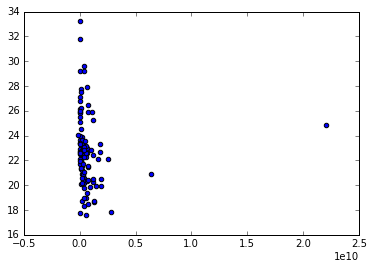

In [44]:
plt.scatter(merged6['Aid received'], merged['Age married'])
# So the aid received does not influence the age at which women marry for the first time.

In [47]:
# I want to seee if there is any correspondence between the age to marry and prevalence of contraceptives.

response = requests.get("http://api.worldbank.org/countries/indicators/SP.DYN.CONU.ZS?per_page=250&date=2005:2005&format=json")
data = response.json()
df7 = pd.read_json(json.dumps(data[1]))
# I need to clean the DataFrame, as per usual
df7['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['country'])))
df7['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df7['indicator'])))
contraceptives = df7[['country_cleaned', 'value']]
contraceptives.columns = 'Country', 'Contraceptives'
merged7 = pd.merge(contraceptives, agemarriage, on='Country')

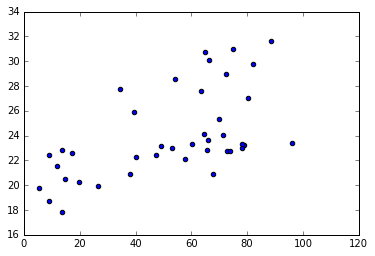

In [48]:
plt.scatter(merged7['Contraceptives'], merged['Age married'])
# There is some sort of positive correlation.

In [50]:
# I want to see the relationship between the age of first marrying and primary completion rate for both sexes.
response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.ZS?per_page=250&date=2005:2005&format=json")
data = response.json()
df8 = pd.read_json(json.dumps(data[1]))
df8['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['country'])))
df8['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df8['indicator'])))
primarytot = df8[['country_cleaned', 'value']]
primarytot.columns = 'Country', 'Primary completion rate'
merged8 = pd.merge(primarytot, agemarriage, on='Country')

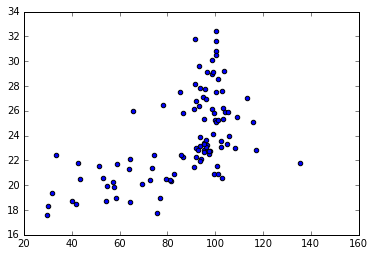

In [51]:
plt.scatter(merged8['Primary completion rate'], merged['Age married'])
# There is some sort of positive correlation.

In [52]:
# I now just want to look at the primary completion rate for females only.

response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.ZS?per_page=250&date=2005:2005&format=json")
data = response.json()
df9 = pd.read_json(json.dumps(data[1]))
df9['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['country'])))
df9['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df9['indicator'])))
primaryfem = df8[['country_cleaned', 'value']]
primaryfem.columns = 'Country', 'Primary completion rate female'
merged9 = pd.merge(primaryfem, agemarriage, on='Country')

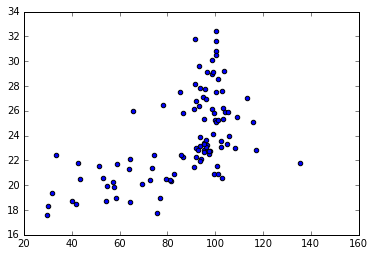

In [53]:
plt.scatter(merged9['Primary completion rate female'], merged['Age married'])
# There is some a clearer positive correlation.

In [54]:
# I now want to compare it with primary completion rate for males.

response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.CMPT.MA.ZS?per_page=250&date=2005:2005&format=json")
data = response.json()
df10 = pd.read_json(json.dumps(data[1]))
df10['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['country'])))
df10['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df10['indicator'])))
primarymal = df10[['country_cleaned', 'value']]
primarymal.columns = 'Country', 'Primary completion rate male'
merged10 = pd.merge(primarymal, agemarriage, on='Country')

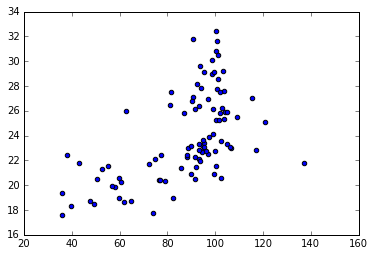

In [56]:
plt.scatter(merged10['Primary completion rate male'], merged['Age married'])
# There is some sort of positive correlation.

In [57]:
# I want to see how that correlates with the pupil-teacher ratio.

response = requests.get("http://api.worldbank.org/countries/indicators/SE.PRM.ENRL.TC.ZS?per_page=250&date=2005:2005&format=json")
data = response.json()
df11 = pd.read_json(json.dumps(data[1]))
df11['country_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['country'])))
df11['indicator_cleaned'] = pd.DataFrame(map(lambda x: x['value'], list(df11['indicator'])))
pupilteach = df11[['country_cleaned', 'value']]
pupilteach.columns = 'Country', 'Pupil-teacher ratio'
merged11 = pd.merge(pupilteach, agemarriage, on='Country')

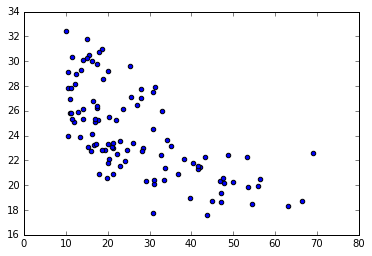

In [58]:
plt.scatter(merged11['Pupil-teacher ratio'], merged['Age married'])
# There is some sort of positive correlation.